#Exercise 10-1.

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height?

Like the NSFG, the BRFSS oversamples some groups and provides a sampling weight for each respondent. In the BRFSS data, the variable name for these wght is totalwt. Use resampling, with and without wght, to estimate the mean height of respondents in the BRFSS, the standard error of the mean, and a 90% confidence interceptval. How much does correct weighting affect the estimates?


Author: Rajasekharreddy Karna


02/07/2021


Read the BRFSS data and extract hgt and log wght.

In [1]:
import brfss

df = brfss.ReadBrfss(nrows=None)
df = df.dropna(subset=['htm3', 'wtkg2'])
hgt, wght = df.htm3, df.wtkg2
log_wght = np.log10(wght)

Estimate interceptcept and slope.

In [2]:
# Analysis Code is:

intercept, slope = thinkstats2.LeastSquares(hgt, log_wght)
intercept, slope

(0.9930804163917621, 0.005281454169418104)

Make a scatter plot of the data and show the fitted line.

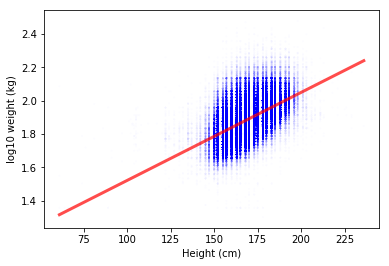

In [3]:
# Analysis Code is:

thinkplot.Scatter(hgt, log_wght, alpha=0.01, s=5)
fxs, fys = thinkstats2.FitLine(hgt, intercept, slope)
thinkplot.Plot(fxs, fys, color='red')
thinkplot.Config(xlabel='Height in cm', ylabel='log10 weight in kg', legend=False)

Make the same plot but apply the inverse transform to show wght on a linear (not log) scale.

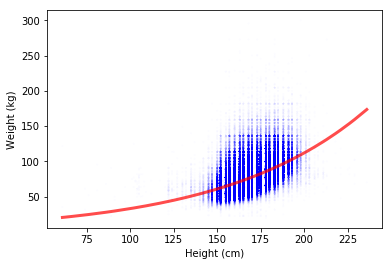

In [4]:
# Analysis Code is:

thinkplot.Scatter(hgt, wght, alpha=0.01, s=5)
fxs, fys = thinkstats2.FitLine(hgt, intercept, slope)
thinkplot.Plot(fxs, 10**fys, color='red')
thinkplot.Config(xlabel='Height In cm', ylabel='Weight in kg', legend=False)

Plot percentiles of the residuals.

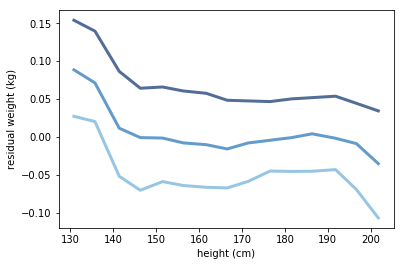

In [5]:
# Analysis Code is:

# The lines are flat, indicating that the relationship is linear. And the lines are closely parallel, indicating that the variance of the residuals is the same over the range.

res = thinkstats2.Residuals(hgt, log_wght, intercept, slope)
df['residual'] = res

bins = np.arange(130, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

means = [group.htm3.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.residual) for i, group in groups][1:-1]

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    ys = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(means, ys, label=label)
    
thinkplot.Config(xlabel='height in cm', ylabel='residual weight in kg', legend=False)

Compute correlation.

In [6]:
# Analysis Code is:

rho = thinkstats2.Corr(hgt, log_wght)
rho

0.5317282605983589

Compute coefficient of determination.

In [7]:
# Analysis Code is:

r2 = thinkstats2.CoefDetermination(log_wght, res)
r2

0.2827349431189434

Confirm that $R^2 = \rho^2$.

In [8]:
# Analysis Code is:

rho**2 - r2

1.2823075934420558e-14

Compute Std(ys), which is the RMSE of predictions that don't use height.

In [9]:
# Analysis Code is:

std_ys = thinkstats2.Std(log_wght)
std_ys

0.10320725030004975

Compute Std(res), the RMSE of predictions that do use height.

In [10]:
# Analysis Code is:

std_res = thinkstats2.Std(res)
std_res

0.08740777080416137

How much does height information reduce RMSE?

In [11]:
# Analysis Code is:

1 - std_res / std_ys

0.15308497658793607

Use resampling to compute sampling distributions for intercept and slope.

In [12]:
# Analysis Code is:

t = []
for _ in range(100):
    sample = thinkstats2.ResampleRows(df)
    estimates = thinkstats2.LeastSquares(sample.htm3, np.log10(sample.wtkg2))
    t.append(estimates)

intercepts, slopes = zip(*t)

Plot the sampling distribution of slope.

{'xscale': 'linear', 'yscale': 'linear'}

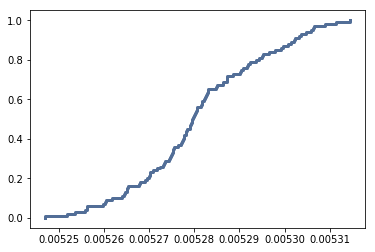

In [13]:
# Analysis Code is:

cdf = thinkstats2.Cdf(slopes)
thinkplot.Cdf(cdf)

Compute the p-value of the slope.

In [14]:
# Analysis Code is:

p-value = cdf[0]
p-value

0

Compute the 90% confidence interceptval of slope.

In [15]:
# Analysis Code is:

ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(0.005256179585510808, 0.005305925811393488)

Compute the mean of the sampling distribution.

In [16]:
# Analysis Code is:

mean = thinkstats2.Mean(slopes)
mean

0.005280974367722204

Compute the standard deviation of the sampling distribution, which is the standard error.

In [17]:
# Analysis Code is:

standard deviation = thinkstats2.Std(slopes)
standard deviation

1.4328644946448544e-05

Resample rows without wght, compute mean height, and summarize results.

In [18]:
# Analysis Code is:

estimates_unweighted = [thinkstats2.ResampleRows(df).htm3.mean() for _ in range(100)]
Summarize(estimates_unweighted)

mean, SE, CI 168.9567580690798 0.01719931368075356 (168.9266633319186, 168.9880782756321)


Resample rows with wght.  Note that the weight column in this dataset is called `finalwt`.

In [19]:
# Analysis Code is:

# The estimated mean height is close to 2 cm taller. So if we take into account the sampling wght and this difference is much bigger than the sampling error.

estimates_weighted = [ResampleRowsWeighted(df, 'finalwt').htm3.mean() for _ in range(100)]
Summarize(estimates_weighted)

mean, SE, CI 170.497091619677 0.01746768128310096 (170.46624325471413, 170.52783756745285)
